In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Advertising.csv').drop('Unnamed: 0', axis =1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
numboots = 1000
#Budget = [[1000]]
Budget = pd.DataFrame({'TV': [1000]}) 

#sales prediction for each bootstrap
sales_dist = []

In [4]:
def error_pred(y,y_p):
    n = len(y)
    return np.sqrt(np.sum((y-y_p)**2/(n-2)))

In [5]:
for i in range(numboots):
    df_new = df.sample(frac = 1, replace = True)
    x = df_new[['TV']]
    y = df_new['Sales']
    
    lreg = LinearRegression()
    lreg.fit(x, y)
    
    prediction = lreg.predict(Budget)
    y_pred = lreg.predict(x)
    
    error = np.random.normal(0, error_pred(y, y_pred))
    sales = prediction + error
    sales_dist.append(float(sales))

In [6]:
# We sort the list containing sales predictions in ascending values
sales_dist.sort()

# find the 95% confidence interval using np.percentile function at 2.5% and 97.5%
sales_CI = (np.percentile(sales_dist, 2.5), np.percentile(sales_dist, 97.5))

In [7]:
def plot_simulation(simulation,confidence):
    plt.hist(simulation, bins = 30, label = 'beta distribution', align = 'left', density = True,edgecolor='k')
    plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel('Beta value')
    plt.ylabel('Frequency')
    plt.legend(frameon = False, loc = 'upper right')

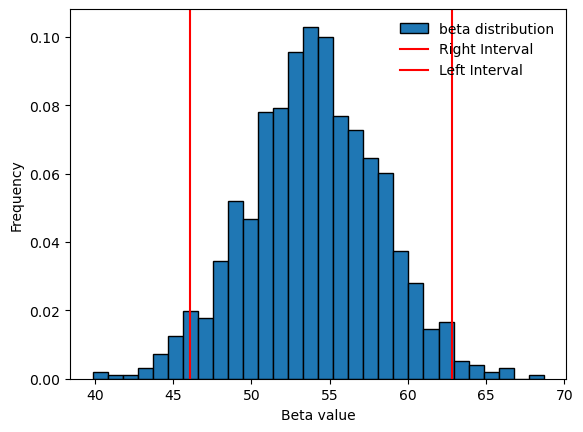

In [8]:
plot_simulation(sales_dist,sales_CI)

In [9]:
print(f"With a TV advertising budget of ${Budget['TV'][0]},")
print(f"we can expect an increase of sales anywhere between {sales_CI[0]:0.2f} to {sales_CI[1]:.2f}\
 with a 95% confidence interval")

With a TV advertising budget of $1000,
we can expect an increase of sales anywhere between 46.06 to 62.84 with a 95% confidence interval
